# Hackathon-Datensatz

## Maschinelles Lernen - WiSe 23/24

Führen Sie die folgenden Notenbook-Zellen aus, um den Hackathon-Datensatz herunterzuladen. Sie können das Zielverzeichnis mithilfe der Variablen `unzip_path` spezifizieren.
In das angegebene Verzeichnis werden zwei Dateien entpackt:
- `train.csv` enthält den Datensatz als CSV-Datei
- `data_description` enthält eine kurze Beschreibung aller Attribute und eine Erläuterung der bei nominalen Attributen verwendeten Abkürzungen

In [1]:
unzip_path = "./dataset/"

In [4]:
from io import BytesIO
from urllib.request import urlopen
from zipfile import ZipFile
import os
import pandas as pd
import numpy as np

# data_url = "https://dshare.mathematik.uni-marburg.de/index.php/s/GrPtczNmDZQcn9f/download/training_dataset.zip"

# with urlopen(data_url) as zipresp:
#     with ZipFile(BytesIO(zipresp.read())) as zfile:
#         zfile.extractall(unzip_path)
        
print('Dataset extracted to "{:s}"'.format(os.path.realpath(unzip_path)))
df = pd.read_csv('dataset/train.csv', index_col='Id')
# df.head(5)

Dataset extracted to "C:\Users\evaqw\Pictures\UniMarburg\ML\Hackaton\ml_hackathon\dataset"


In [6]:
features = df.columns[:-1]
features_20_1, features_20_2, features_20_3, features_19_4 = features[:20], features[20:40], features[40:60], features[60:]

df_20_1 = pd.concat([df[features_20_1], df['Verkaufspreis']], axis=1)
df_20_2 = pd.concat([df[features_20_2], df['Verkaufspreis']], axis=1)
df_20_3 = pd.concat([df[features_20_3], df['Verkaufspreis']], axis=1)
df_20_4 = pd.concat([df[features_19_4], df['Verkaufspreis']], axis=1)


## Work pipeline
0. Divide features between uns and do EDA OR divide the part of pipeline, since there is not relevant feature separate from each other analyse
1. Data analysis  
    - Nulls and how many in percentage - could we just delete them?
    - Outliers and how many in percentage
    - Mean, median, std, 
    - Distribution (histrograms, bar charts, boxplots with quantiles, qq-plots)
    - Duplicates
    - Correlation coefficient  
  
2. Data transformation and preparation
    - Fill null values
    - Reduce outliers
    - Reduce duplicates
    - Normalisation
    - Dimension reduction  
    
3. Building the model
    - Does it make sence built 4 diffirent model and then compare they? 

Hinweisen fuer Pandas, Matplotlib, ..: https://ilias.uni-marburg.de/goto.php?target=file_3408609_download&client_id=UNIMR

## EDA (first 20 features) 

In [7]:
pd.options.display.max_columns = 21

In [8]:
df = df_20_1
df.shape

(2000, 21)

In [9]:
df.head()

,Wohngebiet,Nachbarschaft,Bedingung1,Bedingung2,Wohnungsklasse,Gebauedetyp,Wohnungsstil,Baujahr,Umbaujahr,Hausqualitaet,Hauszustand,Versorgung,Grundstuecksgroesse,Grundstuecksform,Gelaendekontur,Gelaendeneigung,Grundstueckanordnung,Strassenlaenge,Strassentyp,Zufahrtsweg,Verkaufspreis
Id,,,,,,,,,,,,,,,,,,,,,
1,WN,Gallus,Norm,Norm,20,1Fam,1Sto,1962,1962,3,3,EGWA,918.54,Reg,Ebn,San,Eck,22.2,Pfla,NaN,69700.0
2,WN,Gallus,Norm,Norm,20,1Fam,1Sto,2015,2016,5,5,EGWA,632.16,Reg,Ebn,San,Inn,18.0,Pfla,NaN,133450.0
3,WN,Eckenhe,Norm,Norm,50,1Fam,2Sto,1930,1960,6,5,EGWA,1960.20,Reg,Ebn,San,Inn,19.8,Pfla,NaN,165750.0
4,WN,Ginnhei,Norm,Norm,60,1Fam,2Sto,2009,2010,6,5,EGWA,868.41,UR1,Ebn,San,Inn,17.7,Pfla,NaN,157250.0
5,WN,Eckenhe,Norm,Norm,70,1Fam,2Sto,1939,1960,8,7,EGWA,1029.15,UR1,Hng,Mit,Eck,NaN,Pfla,NaN,195500.0


In [10]:
df.describe(include='all')

,Wohngebiet,Nachbarschaft,Bedingung1,Bedingung2,Wohnungsklasse,Gebauedetyp,Wohnungsstil,Baujahr,Umbaujahr,Hausqualitaet,Hauszustand,Versorgung,Grundstuecksgroesse,Grundstuecksform,Gelaendekontur,Gelaendeneigung,Grundstueckanordnung,Strassenlaenge,Strassentyp,Zufahrtsweg,Verkaufspreis
count,1997,2000,2000,2000,2000.000000,2000,2000,2000.000000,2000.000000,2000.000000,2000.000000,1998,2000.000000,2000,2000,2000,2000,1662.000000,2000,132,2000.00000
unique,5,25,9,6,NaN,5,8,NaN,NaN,NaN,NaN,1,NaN,4,4,3,5,NaN,2,2,NaN
top,WN,Höchst,Norm,Norm,NaN,1Fam,1Sto,NaN,NaN,NaN,NaN,EGWA,NaN,Reg,Ebn,San,Inn,NaN,Pfla,Scho,NaN
freq,1551,298,1728,1987,NaN,1664,1002,NaN,NaN,NaN,NaN,1998,NaN,1281,1798,1906,1452,NaN,1993,78,NaN
mean,NaN,NaN,NaN,NaN,57.337500,NaN,NaN,1981.358500,1994.088500,6.089000,5.553500,NaN,912.937905,NaN,NaN,NaN,NaN,20.684477,NaN,NaN,153708.42060
std,NaN,NaN,NaN,NaN,42.991252,NaN,NaN,30.349374,21.045454,1.408215,1.094412,NaN,738.556922,NaN,NaN,NaN,NaN,6.944439,NaN,NaN,68822.30926
min,NaN,NaN,NaN,NaN,20.000000,NaN,NaN,1882.000000,1960.000000,1.000000,1.000000,NaN,117.000000,NaN,NaN,NaN,NaN,6.300000,NaN,NaN,10870.65000
25%,NaN,NaN,NaN,NaN,20.000000,NaN,NaN,1963.000000,1975.000000,5.000000,5.000000,NaN,669.622500,NaN,NaN,NaN,NaN,17.400000,NaN,NaN,109650.00000
50%,NaN,NaN,NaN,NaN,50.000000,NaN,NaN,1983.000000,2003.000000,6.000000,5.000000,NaN,843.570000,NaN,NaN,NaN,NaN,20.250000,NaN,NaN,136000.00000
75%,NaN,NaN,NaN,NaN,70.000000,NaN,NaN,2011.000000,2014.000000,7.000000,6.000000,NaN,1032.750000,NaN,NaN,NaN,NaN,24.000000,NaN,NaN,181475.00000


In [16]:
from matplotlib.ticker import PercentFormatter
import matplotlib.pyplot as plt

def plot_histogram(data, nbins, figsize=None, title='', xlabel='', ylabel='Frequency'):
    
    plt.figure(figsize=figsize)
    plt.hist(data, bins=nbins,  weights=np.ones(len(data)) / len(data))
    plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
    
def plot_scatter(data1, data2, figsize=None, title='', xlabel='', ylabel='Frequency', s=None):
    
    plt.figure(figsize=figsize)
    plt.scatter(data1, data2, s=s)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
    
def plot_boxplot(data, figsize=None, title='', vert=True):
    
    plt.figure(figsize=figsize)
    plt.boxplot(data, vert=vert)
    plt.title(title)
    plt.show()

### Target
We can delete lines with target > 450000 since it is seems they are outliers

How many null values in target? 0


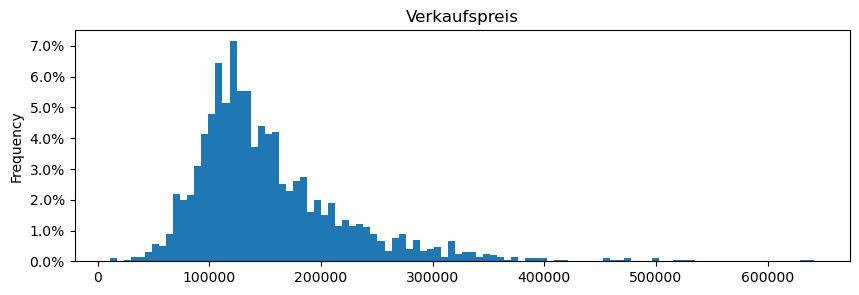

In [17]:
print(f'How many null values in target? {df.Verkaufspreis.isna().sum()}')
plot_histogram(df.Verkaufspreis, 100, (10,3), 'Verkaufspreis', )

In [18]:
buf = df[df.Verkaufspreis > 450000]

print(f'How many target values more than 450000: {buf.shape[0]} ({buf.shape[0] / df.shape[0] * 100})%')
buf

How many target values more than 450000: 13 (0.65)%


,Wohngebiet,Nachbarschaft,Bedingung1,Bedingung2,Wohnungsklasse,Gebauedetyp,Wohnungsstil,Baujahr,Umbaujahr,Hausqualitaet,Hauszustand,Versorgung,Grundstuecksgroesse,Grundstuecksform,Gelaendekontur,Gelaendeneigung,Grundstueckanordnung,Strassenlaenge,Strassentyp,Zufahrtsweg,Verkaufspreis
Id,,,,,,,,,,,,,,,,,,,,,
187,WN,Sindlin,Norm,Norm,60,1Fam,2Sto,2016,2016,10,5,EGWA,1625.58,UR1,Hng,San,SG,18.0,Pfla,NaN,463440.40
256,WN,Sindlin,PosN,Norm,20,1Fam,1Sto,2016,2017,9,5,EGWA,4677.66,UR1,Ebn,San,SG,15.6,Pfla,NaN,502848.95
494,WN,Kalbach,Norm,Norm,60,1Fam,2Sto,2004,2005,10,6,EGWA,1938.15,UR1,Ebn,San,Eck,31.2,Pfla,NaN,641750.00
629,WN,Kalbach,Norm,Norm,60,1Fam,2Sto,2003,2004,9,5,EGWA,1551.78,UR1,Ebn,San,Inn,34.2,Pfla,NaN,496825.00
929,WN,Kalbach,Norm,Norm,60,1Fam,2Sto,2006,2006,10,5,EGWA,1406.07,UR1,Ebn,San,Eck,48.0,Pfla,NaN,633250.00
941,WN,Nied,Norm,Norm,20,1Fam,1Sto,2019,2020,9,5,EGWA,1162.71,UR1,Ebn,San,Inn,30.0,Pfla,NaN,519908.45
1072,WN,Nied,Norm,Norm,20,1Fam,1Sto,2014,2015,10,5,EGWA,1335.24,UR1,Hng,Mit,Inn,30.0,Pfla,NaN,469200.00
1084,WN,Kalbach,Norm,Norm,60,1Fam,2Sto,2005,2006,10,5,EGWA,3218.40,UR1,Ebn,San,SG,35.4,Pfla,NaN,531250.00
1099,WN,Sindlin,Norm,Norm,60,1Fam,2Sto,2013,2013,8,5,EGWA,4815.36,UR2,Hng,Mit,SG,14.1,Pfla,NaN,457300.00


In [297]:
buf.describe()

,Wohnungsklasse,Baujahr,Umbaujahr,Hausqualitaet,Hauszustand,Grundstuecksgroesse,Strassenlaenge,Verkaufspreis
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,46.666667,2012.866667,2013.400000,9.466667,5.066667,1973.238000,28.880000,497904.443333
std,19.518001,5.527421,5.435334,0.639940,0.258199,1234.676165,8.528708,66419.030145
min,20.000000,2003.000000,2004.000000,8.000000,5.000000,1144.800000,14.100000,412250.000000
25%,20.000000,2009.500000,2009.500000,9.000000,5.000000,1281.465000,25.050000,460370.200000
50%,60.000000,2015.000000,2016.000000,10.000000,5.000000,1444.680000,31.200000,473093.850000
75%,60.000000,2016.500000,2017.000000,10.000000,5.000000,1781.865000,31.950000,521329.225000
max,60.000000,2019.000000,2020.000000,10.000000,6.000000,4815.360000,48.000000,641750.000000


### Nulls
**Wohngebiet**
- Missing values:  0.15% -> delete

**Versorgung**
- Missing values:  0.1% -> delete

**Strassenlaenge**
- Missing values: 16.9%, Correlation with target: 0.355 -> fill with statistic method, e.g. mean() OR EVEN BETTER fill with mean value for coresponding price

**Zufahrtsweg**
- Missing values: 93.4%, no visual correlation -> delete feature

In [298]:
print(f'Missing values in features in percentage:')
print(f'Wohngebiet: {round(df.Wohngebiet.isna().sum() / df.shape[0], 4)* 100}%')
print(f'Versorgung: {round(df.Versorgung.isna().sum() / df.shape[0], 4) * 100}%')
print(f'Strassenlaenge: {round(df.Strassenlaenge.isna().sum() / df.shape[0] * 100, 4)}%')
print(f'Zufahrtsweg: {round(df.Zufahrtsweg.isna().sum() / df.shape[0], 4) * 100}%')

Missing values in features in percentage:
Wohngebiet: 0.15%
Versorgung: 0.1%
Strassenlaenge: 16.9%
Zufahrtsweg: 93.4%


In [299]:
df[['Strassenlaenge', 'Verkaufspreis']].corr()

,Strassenlaenge,Verkaufspreis
Strassenlaenge,1.000000,0.355442
Verkaufspreis,0.355442,1.000000


In [300]:
buf = df.copy()
buf = buf.fillna({'Strassenlaenge' : df.Strassenlaenge.mean()})
buf[['Strassenlaenge', 'Verkaufspreis']].corr()

,Strassenlaenge,Verkaufspreis
Strassenlaenge,1.000000,0.338971
Verkaufspreis,0.338971,1.000000


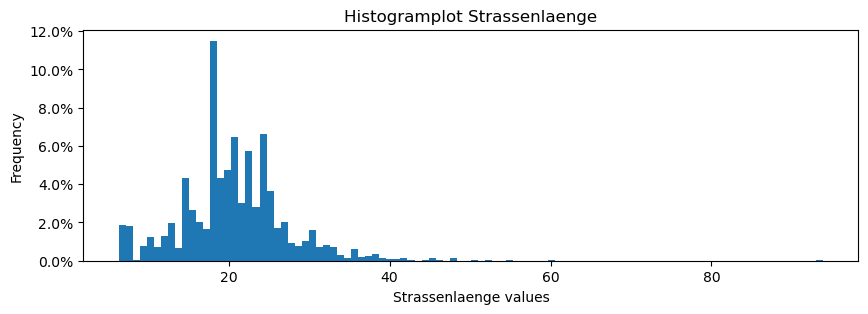

In [301]:
plot_histogram(df.Strassenlaenge, 100, (10,3), 'Histogramplot Strassenlaenge', 'Strassenlaenge values')

In [302]:
buf = df.copy()
buf['Zufahrtsweg'] = df.Zufahrtsweg.fillna('Unknown')
buf.groupby(['Zufahrtsweg'])['Verkaufspreis'].describe()

,count,mean,std,min,25%,50%,75%,max
Zufahrtsweg,,,,,,,,
Pfla,54.0,149661.955556,42938.432762,34000.00,128562.5,142800.0,167237.5,293250.0
Scho,78.0,103910.636538,27856.839401,42500.00,89250.0,100300.0,120827.5,204000.0
Unknown,1868.0,155904.746226,69843.708400,10870.65,110500.0,137700.0,184450.0,641750.0


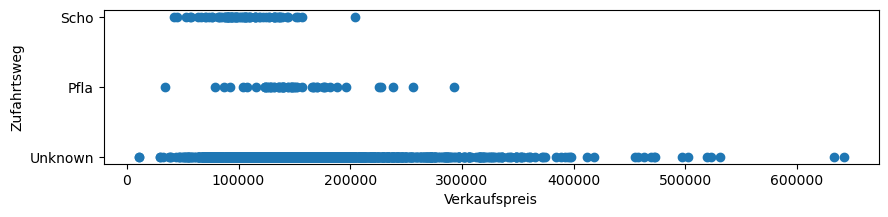

In [357]:
plot_scatter(df['Verkaufspreis'],
             df.fillna({'Zufahrtsweg' : 'Unknown'})['Zufahrtsweg'], 
             (10,2),
             title='', xlabel='Verkaufspreis', ylabel='Zufahrtsweg')

### Outliers
**Grundstuecksgroesse**
- limit values < 5000 $km^2$ and for   
  
**Strassenlaenge**  
- leave all

**Baujahr und Umbaujahr**  
- delete case 714, because there Baujahr is bigger than Umbaujahr
- there are Baujahr less than 1900 but it leads to no problems since data fro this values of feature looks logic

In [304]:
features_categorical_string =  ['Wohngebiet', 'Nachbarschaft', 'Bedingung1', 'Bedingung2', 'Wohnungsklasse', 'Gebauedetyp',
                                'Wohnungsstil', 'Versorgung', 'Grundstuecksform', 'Gelaendekontur', 'Grundstueckanordnung',
                                'Gelaendeneigung', 'Strassentyp', 'Zufahrtsweg']
features_categorical_ordinal = ['Baujahr', 'Umbaujahr', ]
features_numeric =             ['Hausqualitaet', 'Hauszustand', 'Grundstuecksgroesse', 'Strassenlaenge']

print(f'Did we lose some features after dividign to groups? {not ((len(features_categorical_string) + len(features_categorical_ordinal) + len(features_numeric)) == df.shape[1]-1)}')

Did we lose some features after dividign to groups? False


In [352]:
def plot_boxplots(df, n, m):
    
    plt.figure(figsize=(15, 7))
    
    i = -1
    
    for feature in df.columns:
        
        if (not feature in features_categorical_ordinal) and (not feature in features_numeric):
            continue
        
        i += 1

        plt.subplot(n, m, i+1)
        plt.boxplot(df[feature], vert=False)
        plt.title(feature)
    
    plt.show()

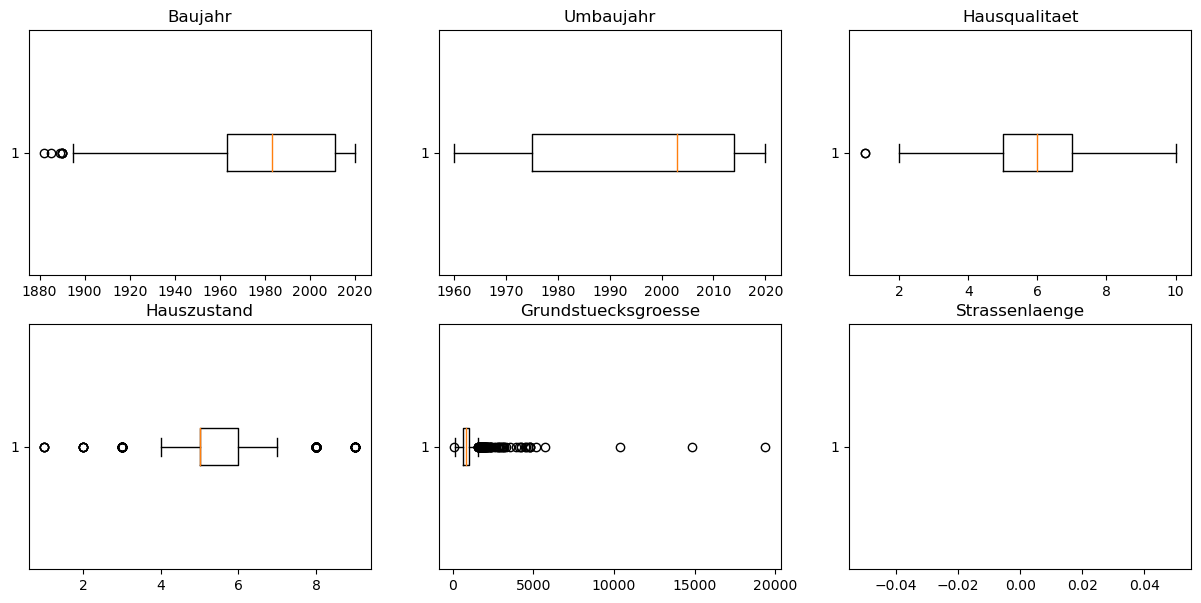

In [353]:
plot_boxplots(df, 2, 3)

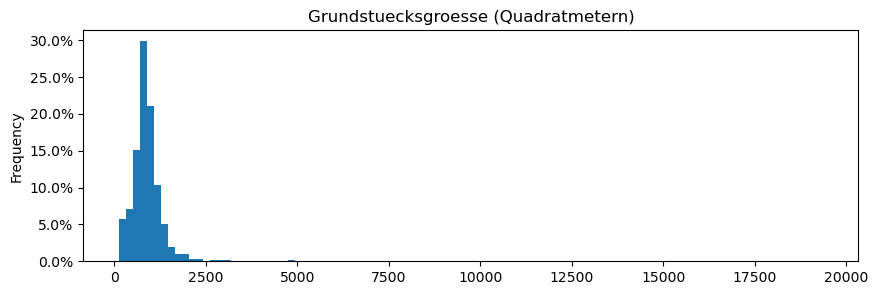

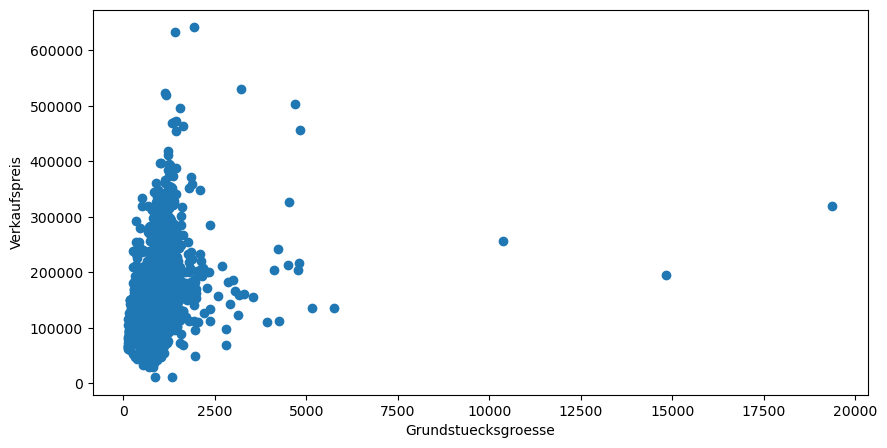

Graphs after transformation


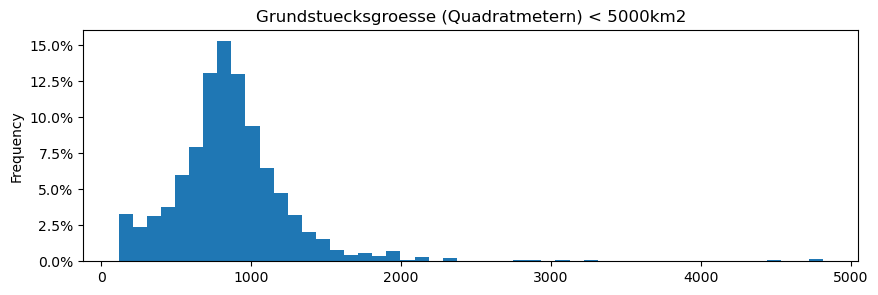

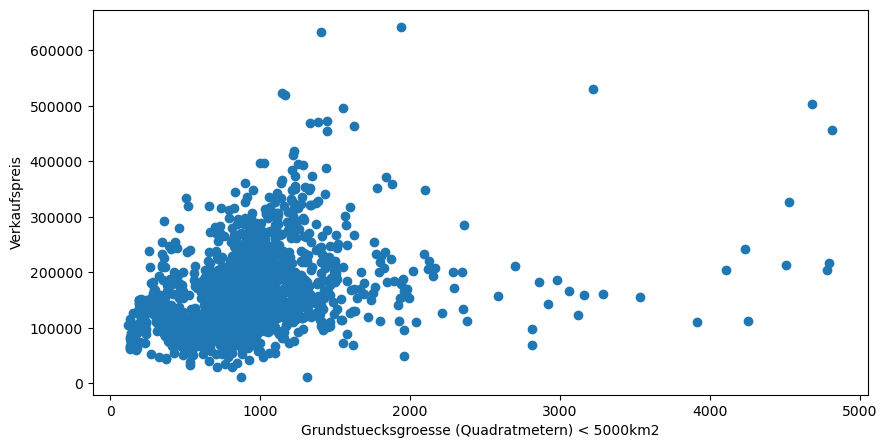

In [325]:
plot_histogram(df.Grundstuecksgroesse, 
               nbins=100, 
               figsize=(10,3),
               title='Grundstuecksgroesse (Quadratmetern)')
plot_scatter(df.Grundstuecksgroesse, 
             df['Verkaufspreis'], 
             figsize=(10,5),
             title='', xlabel='Grundstuecksgroesse', ylabel='Verkaufspreis')

buf = df.copy()
buf = buf[buf['Grundstuecksgroesse'] < 5000]
print('Graphs after transformation')

plot_histogram(buf.Grundstuecksgroesse, 
               nbins=50,
               figsize=(10,3),
               title='Grundstuecksgroesse (Quadratmetern) < 5000km2')
plot_scatter(buf.Grundstuecksgroesse, 
             buf['Verkaufspreis'], 
             figsize=(10,5),
             title='', xlabel='Grundstuecksgroesse (Quadratmetern) < 5000km2', ylabel='Verkaufspreis')


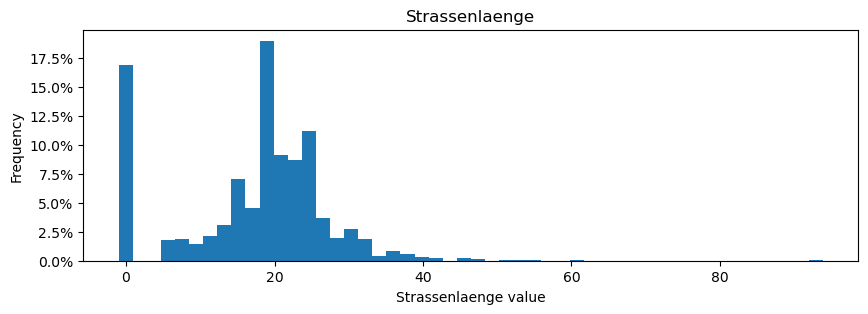

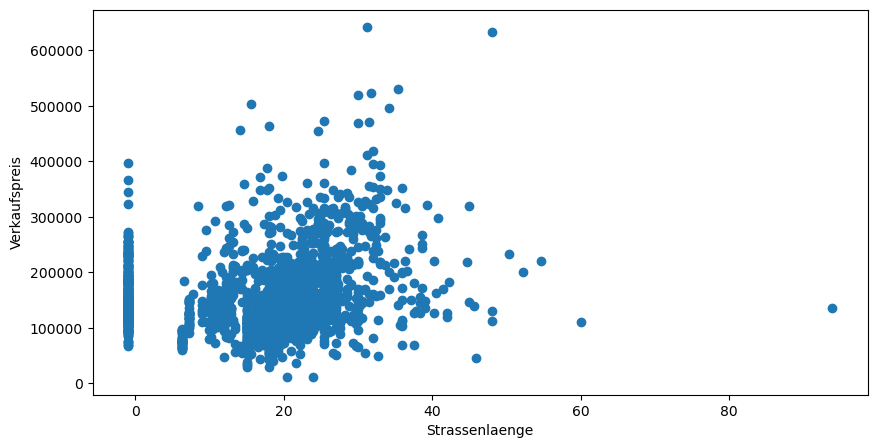

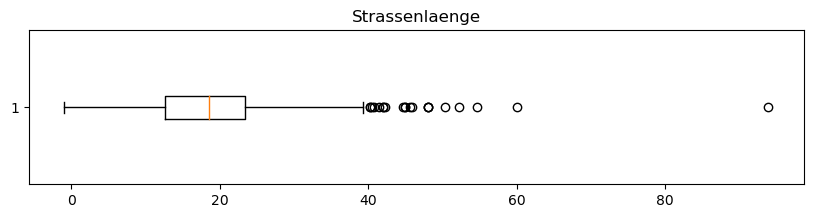

In [332]:
buf = df.copy()
buf = buf.fillna(value={'Strassenlaenge' : -1})

plot_histogram(buf.Strassenlaenge, 
               nbins=50,
               figsize=(10,3), 
               title='Strassenlaenge', 
               xlabel='Strassenlaenge value')
plot_scatter(buf.Strassenlaenge, 
             buf['Verkaufspreis'], 
             figsize=(10,5),
             title='', xlabel='Strassenlaenge', ylabel='Verkaufspreis')
plot_boxplot(buf.Strassenlaenge, 
             figsize=(10,2),
             vert=False,
             title='Strassenlaenge')
plt.show()


In [372]:
print(f'How many Baujahren are bigger than Umbaujahren? {(df.Baujahr > df.Umbaujahr).sum()}')
print(f'How many Umbaujahren bigger than 2023? {(df.Baujahr > 2023).sum()}')

How many Baujahren are bigger than Umbaujahren? 1
How many Umbaujahren bigger than 2023? 0


In [368]:
df[df.Baujahr > df.Umbaujahr].index

Index([714], dtype='int64', name='Id')

In [20]:
print(f'How many Baujahren smaller than 1900? {(df.Baujahr < 1900).sum()} ({(df.Baujahr < 1900).sum() / df.shape[0] * 100} %)')

How many Baujahren smaller than 1900? 9 (0.44999999999999996 %)


In [21]:
df[df.Baujahr < 1900]

,Wohngebiet,Nachbarschaft,Bedingung1,Bedingung2,Wohnungsklasse,Gebauedetyp,Wohnungsstil,Baujahr,Umbaujahr,Hausqualitaet,Hauszustand,Versorgung,Grundstuecksgroesse,Grundstuecksform,Gelaendekontur,Gelaendeneigung,Grundstueckanordnung,Strassenlaenge,Strassentyp,Zufahrtsweg,Verkaufspreis
Id,,,,,,,,,,,,,,,,,,,,,
94,WN,Sachsen,Zubr,Norm,50,1Fam,1.5V,1885,2006,5,8,EGWA,570.78,Reg,Ebn,San,Inn,16.2,Pfla,NaN,79900.00
587,WM,Altstad,Norm,Norm,70,1Fam,2Sto,1882,1997,8,5,EGWA,472.50,Reg,Ebn,San,Inn,15.0,Pfla,Pfla,103700.00
590,WM,Altstad,Norm,Norm,70,1Fam,2Sto,1890,2013,7,7,EGWA,1053.00,UR1,Ebn,San,Eck,19.5,Pfla,Pfla,226082.15
627,WM,Altstad,Haup,Norm,70,1Fam,2Sto,1890,2001,5,6,EGWA,810.00,Reg,Ebn,San,Eck,15.0,Pfla,Scho,105400.00
670,WM,Altstad,Norm,Norm,30,1Fam,1Sto,1895,2005,4,7,EGWA,972.00,Reg,Ebn,San,Inn,18.0,Pfla,Scho,85000.00
1425,WN,Westend,Zubr,Norm,70,1Fam,2Sto,1890,2017,5,7,EGWA,2376.00,Reg,Erh,San,2St,36.0,Pfla,NaN,111350.00
1813,WM,Altstad,Norm,Norm,70,1Fam,2Sto,1890,1960,6,4,EGWA,891.00,Reg,Ebn,San,Inn,27.0,Pfla,NaN,99875.00
1868,WM,Altstad,Norm,Norm,190,2famU,2Sto,1895,1960,4,6,EGWA,1020.60,Reg,Ebn,San,Inn,18.0,Pfla,NaN,104125.00
1917,WM,Altstad,Norm,Norm,75,1Fam,2.5U,1889,1997,7,8,EGWA,1215.00,Reg,Ebn,San,Eck,22.5,Pfla,Scho,157250.00


In [ ]:
df[df.Baujahr]

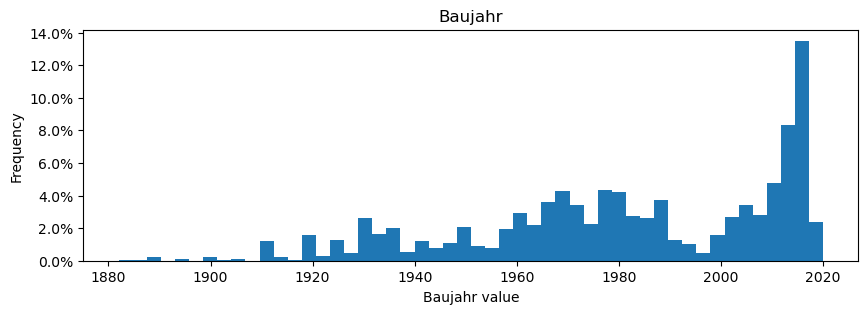

In [19]:
plot_histogram(df.Baujahr, 
               nbins=50,
               figsize=(10,3), 
               title='Baujahr', 
               xlabel='Baujahr value')

Hypothesis: Higher Umbaujahr (higher difference between Baujahr and Umbaujahr respectively) leads to higher price.

C:\Users\evaqw\AppData\Local\Temp\ipykernel_17920\3668774966.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  buf['Jahr_Dif'] = - buf['Baujahr'].values + buf['Umbaujahr'].values


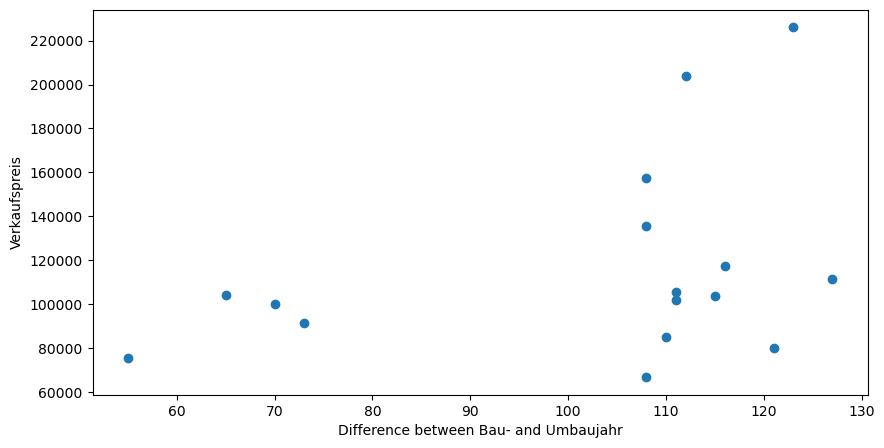

In [55]:
buf = df[df.Baujahr < 1910]
buf['Jahr_Dif'] = - buf['Baujahr'].values + buf['Umbaujahr'].values
plot_scatter(buf.Jahr_Dif, 
             buf['Verkaufspreis'], 
             figsize=(10,5),
             title='', xlabel='Difference between Bau- and Umbaujahr', ylabel='Verkaufspreis')


### Distribution
- **Which features we can delete and in which we can merge some values (look at 'Wohnungstil' after 1.5V)**
- **Could we merge e.g. Bedingung 1 and Bedingung 2**
  
- `Versorgung` has 2 missing values and others are 'EGWA' -> delete feature
 

In [543]:
def plot_distributions(data):
    
    plt.figure(figsize=(30, 30))
    
    for i, feature in enumerate(data.columns):

        plt.subplot(5, 4, i+1)
        
        if feature in features_numeric:
        
            plt.hist(data[feature], bins=100,  weights=np.ones(len(data)) / len(data))
            plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
            plt.title(f'{feature} (in %)')

        else:
            
            plt.bar(data[feature].value_counts().index, 
                    data[feature].value_counts().values / data.shape[0] * 100)
            plt.title(f'{feature} (in %)')

            if feature in ['Nachbarschaft', 'Bedingung1']:
                
                plt.xticks(rotation=45, ha='right')
    
    plt.show()
    
    
def plot_scatters(data):
    
    plt.figure(figsize=(25, 25))
    
    for i, feature in enumerate(data.columns):
        
        if feature == 'Verkaufspreis':
            continue

        plt.subplot(5, 4, i+1)
        
        _ = data[data[feature].notnull()]
        
        plt.scatter(_[feature], _['Verkaufspreis'], s=2)
        plt.xlabel(feature)
        plt.ylabel('Verkaufspreis')
        
        if feature in ['Nachbarschaft', 'Bedingung1']:

            plt.xticks(rotation=45, ha='right')
    
    plt.show()

# Compare scatter and bar
If in barchart there is one value which occupies the highest bar AND (differencies in prices between this value and others is not cruicial OR AND EVEN BETTER distributions in price between this value and others are same), then feature is meaningfullness -> **delete OR merge some values** (look at the example `Wohnungstil` after value 1.5V)

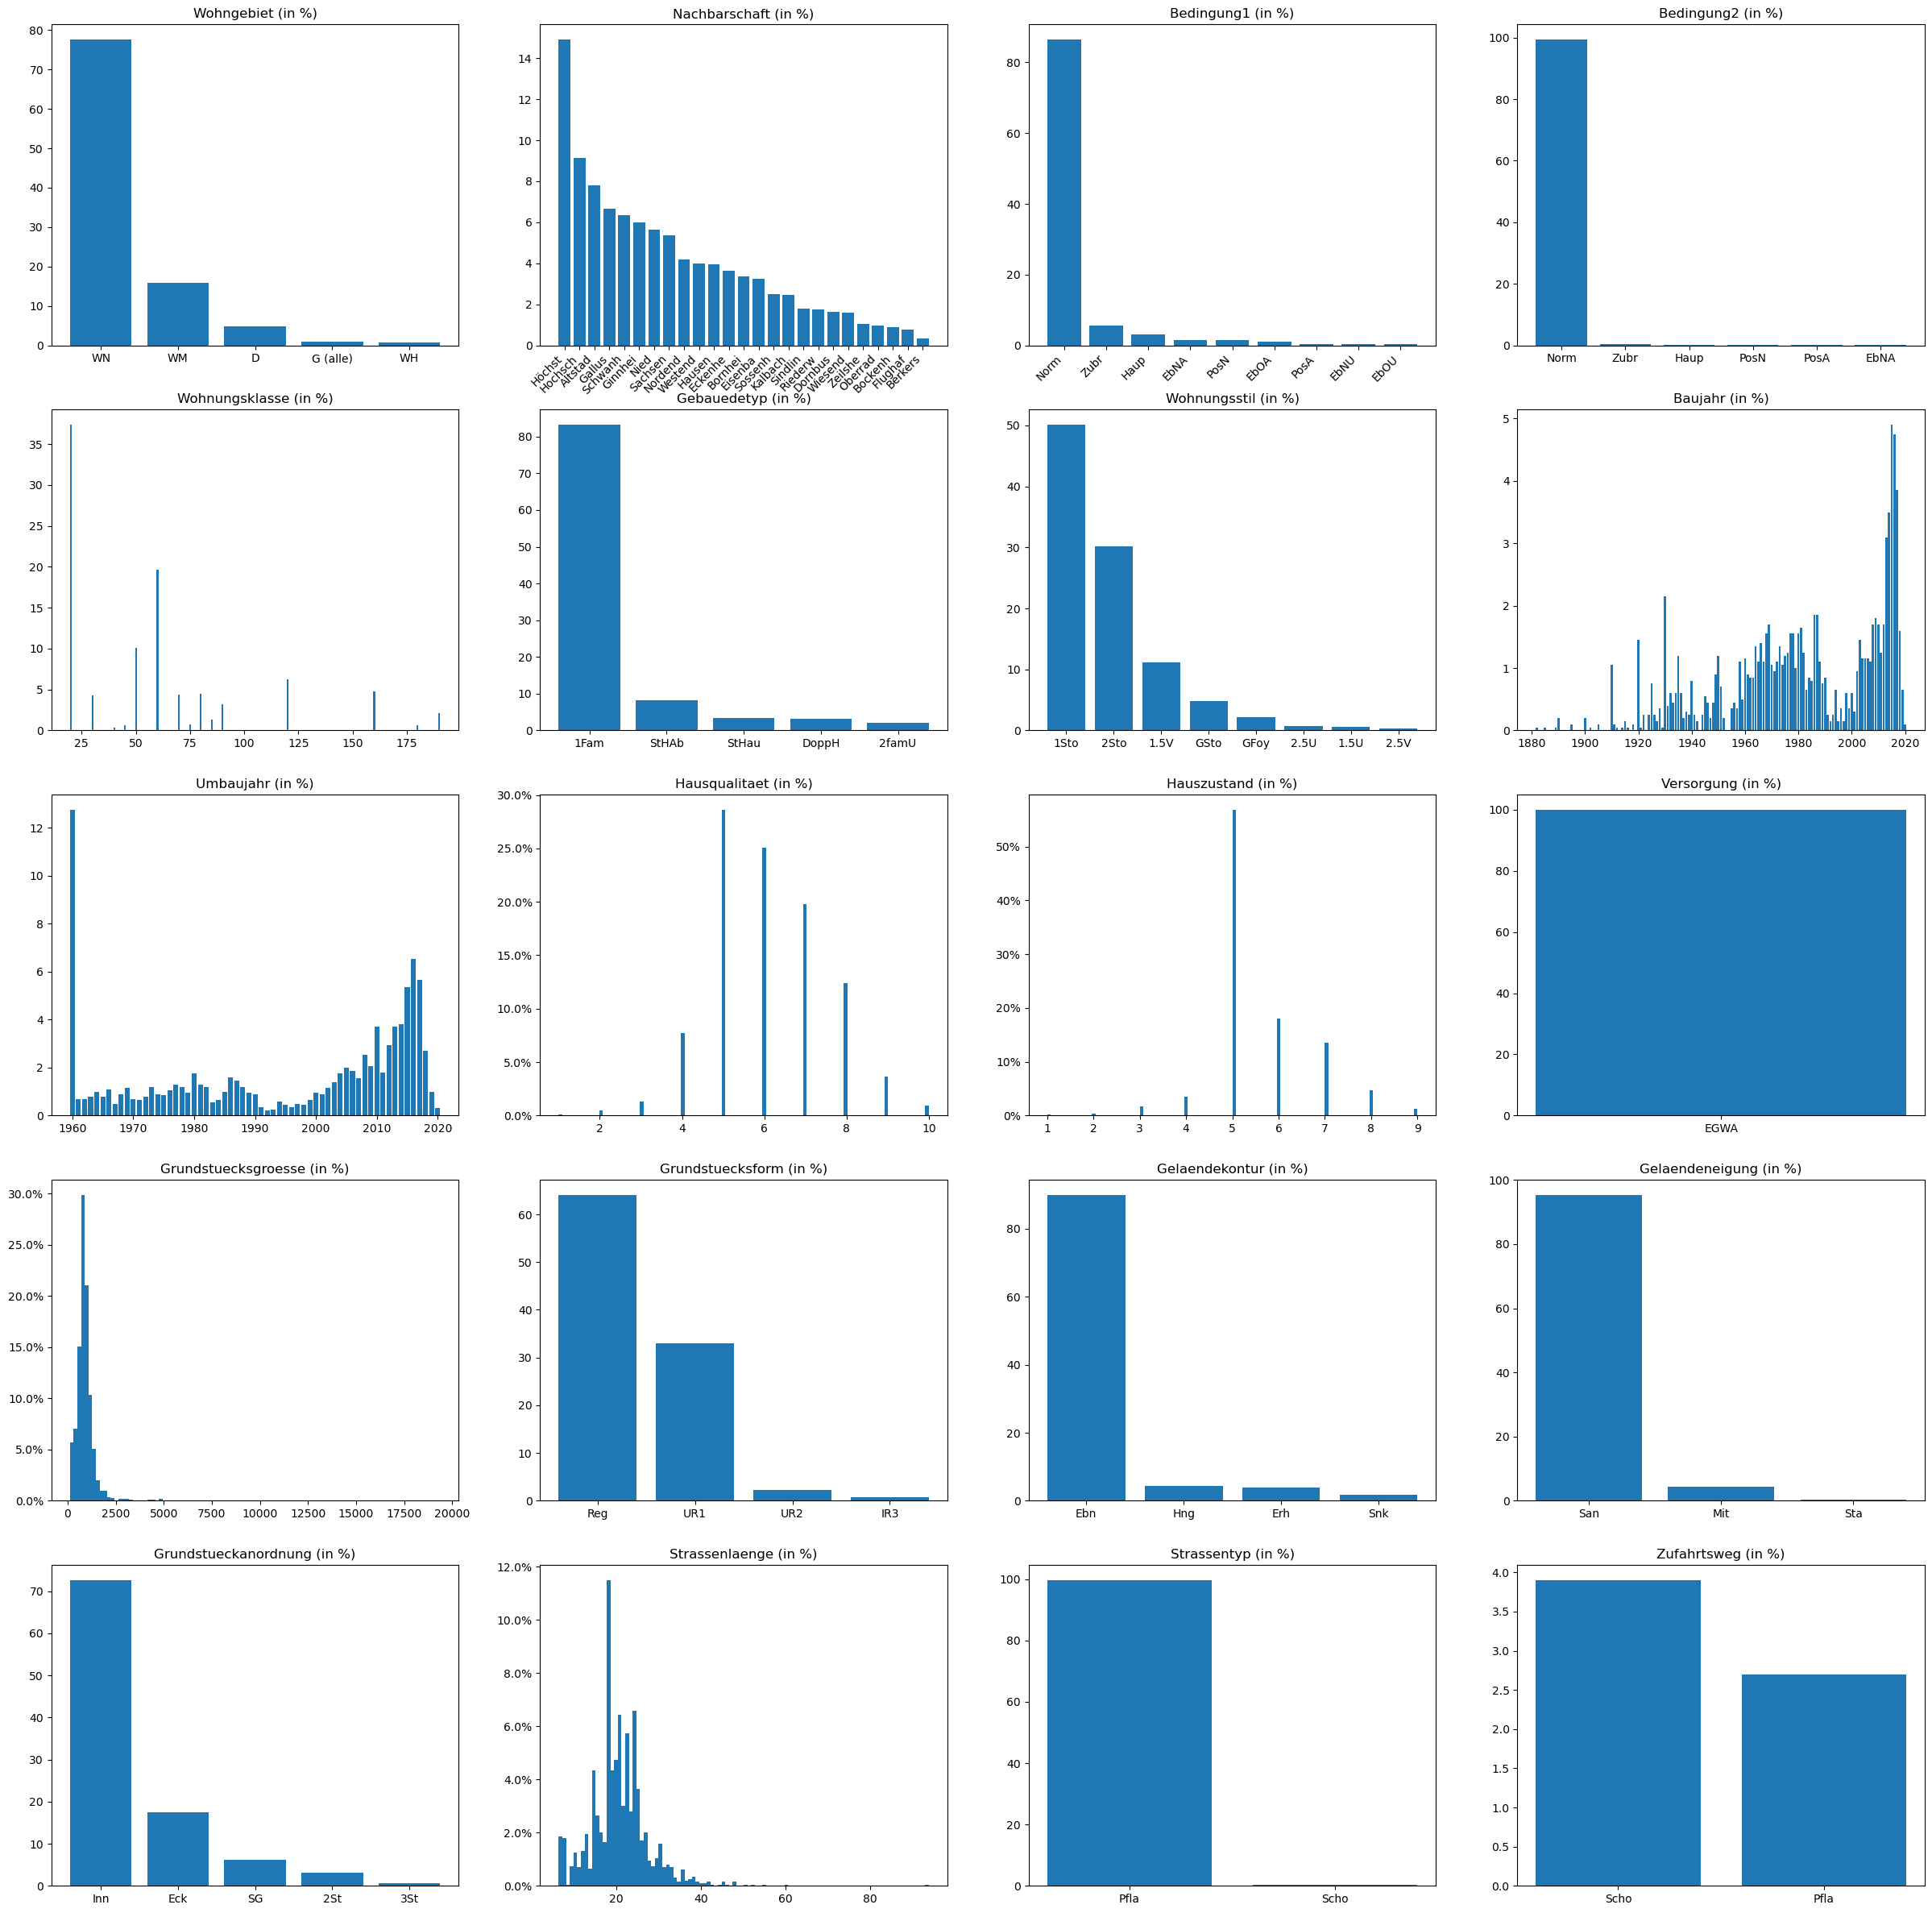

In [544]:
plot_distributions(df.drop(columns='Verkaufspreis'))

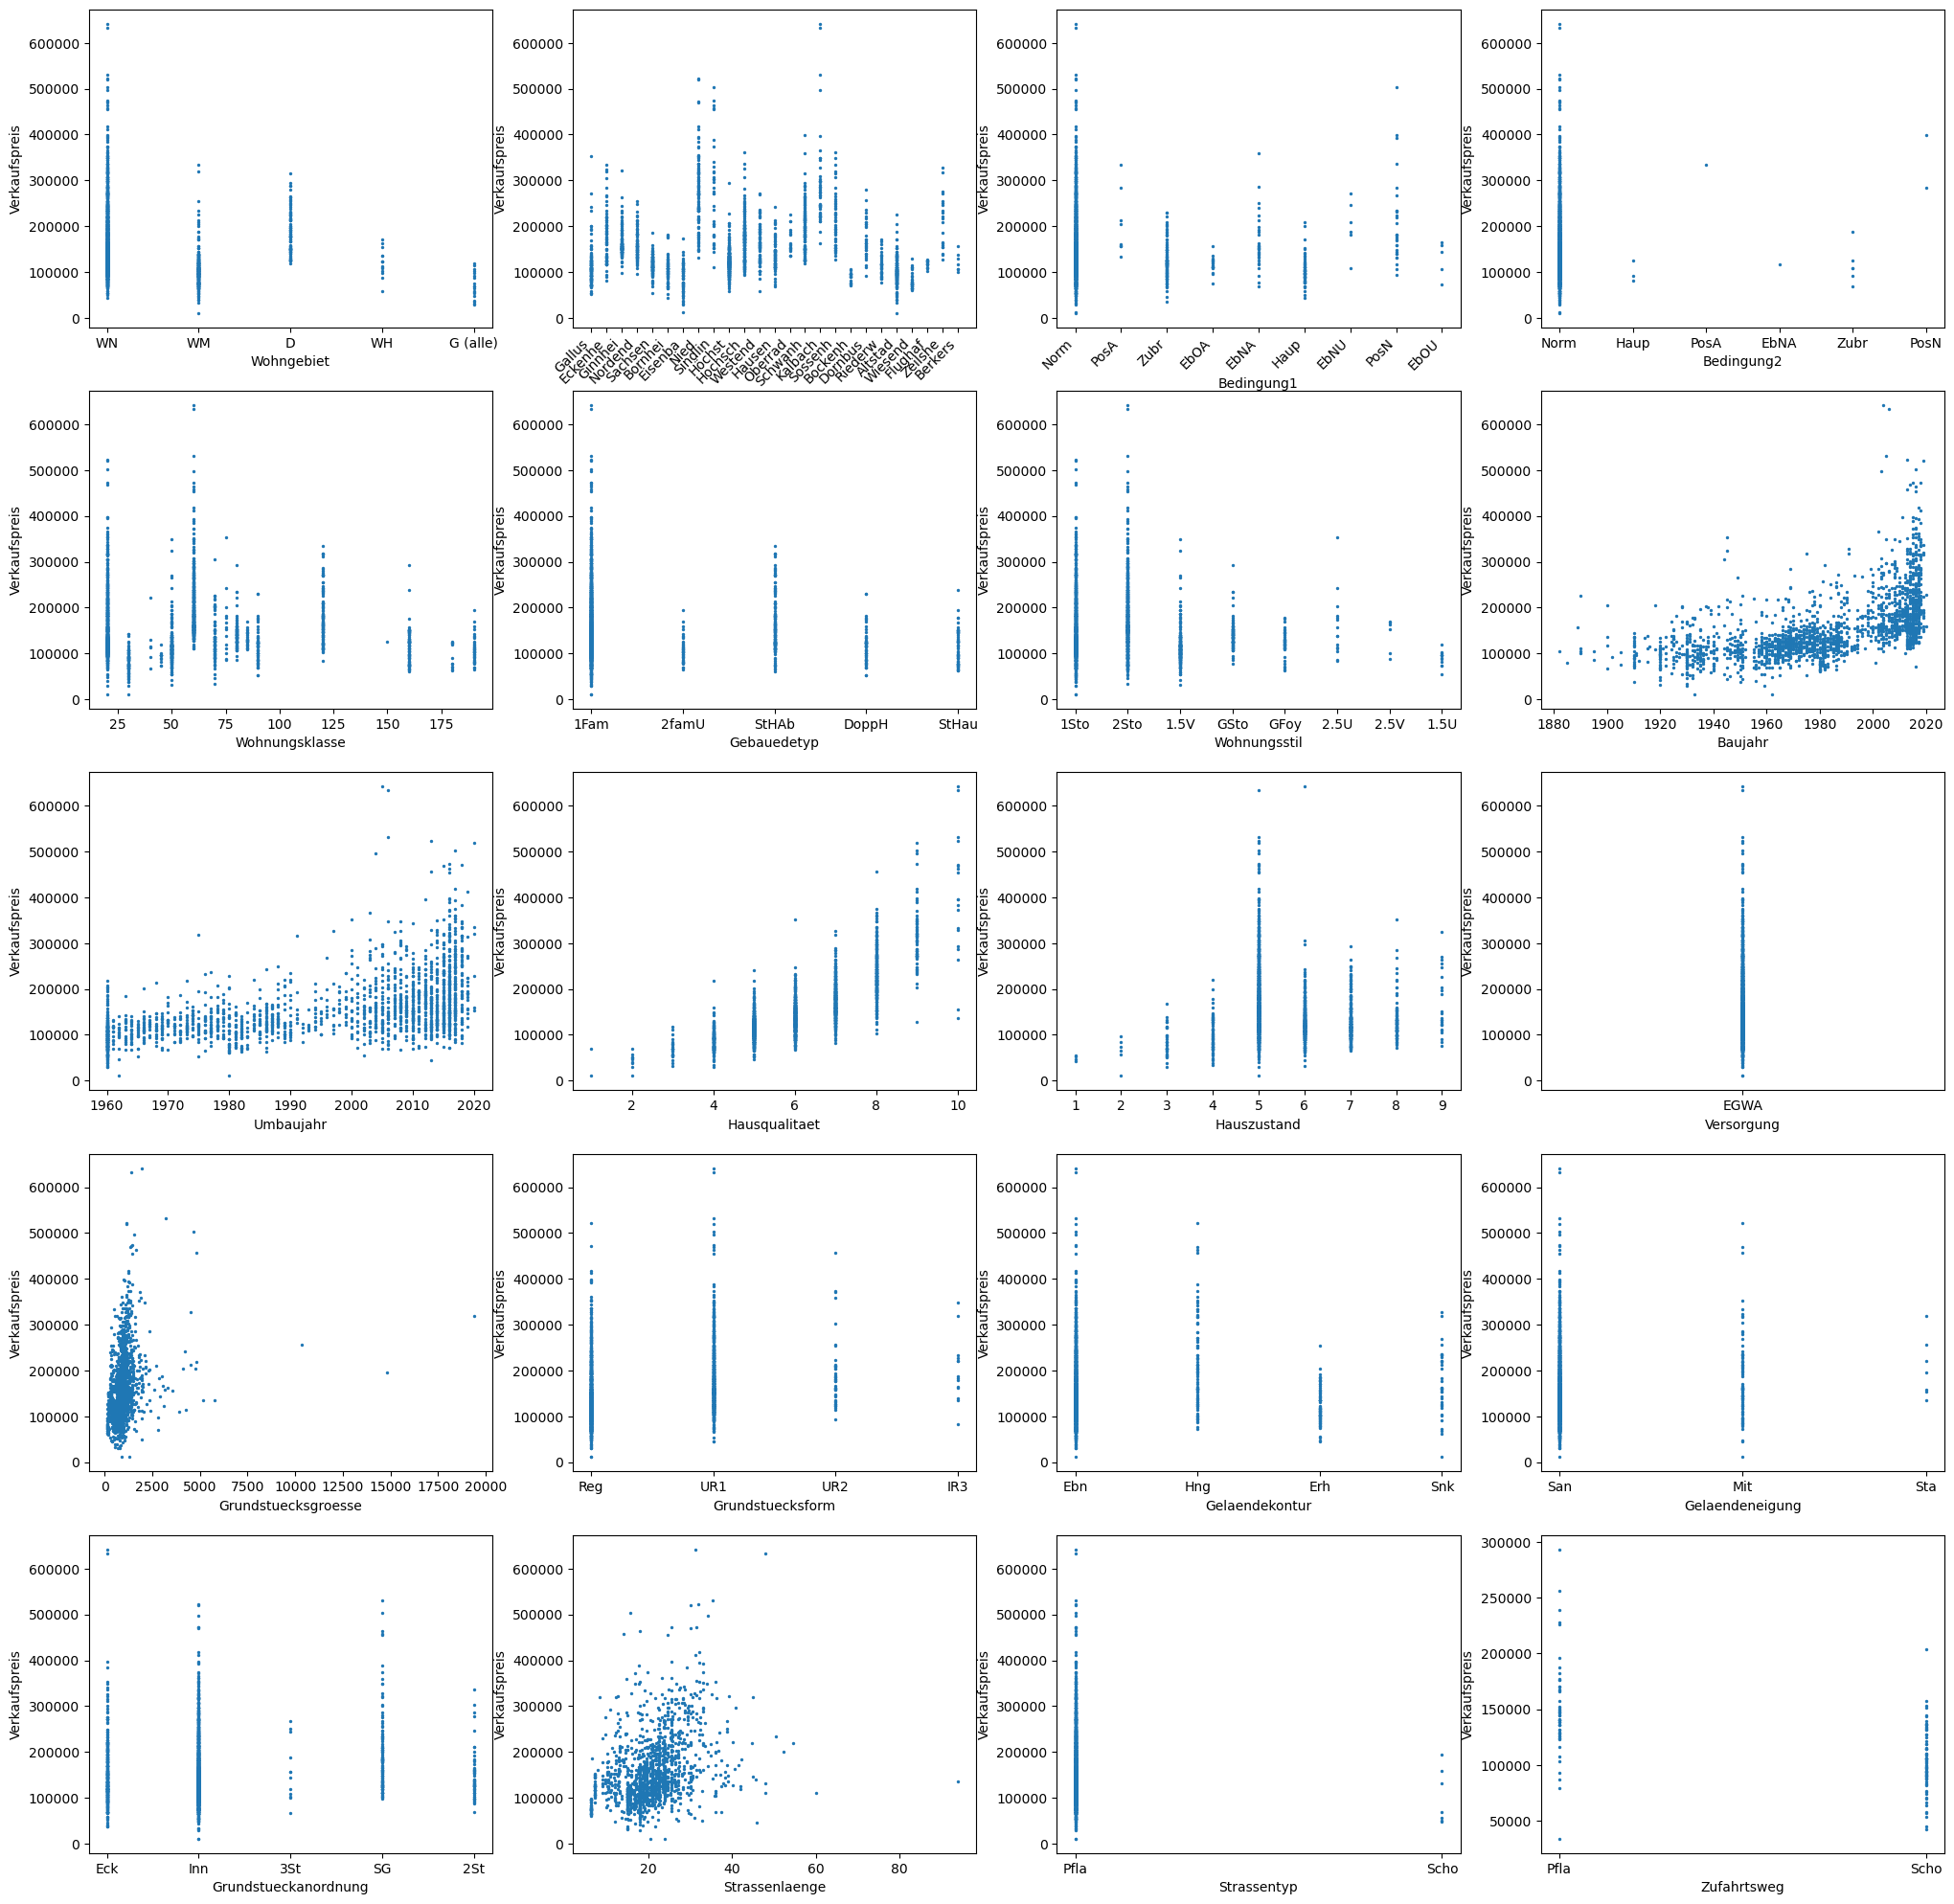

In [545]:
plot_scatters(df)

In [458]:
df.Versorgung.value_counts()

Versorgung
EGWA    1998
Name: count, dtype: int64

<Axes: xlabel='Bedingung1', ylabel='Bedingung2'>

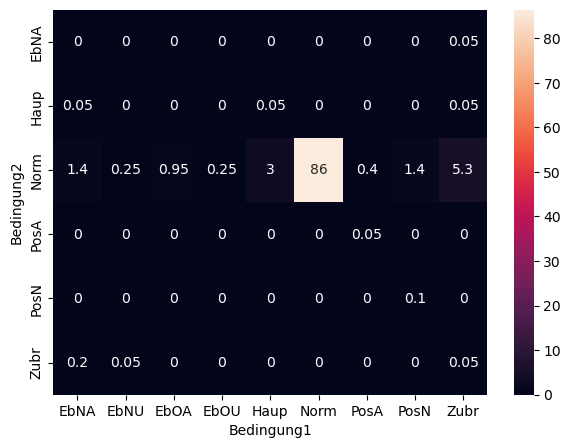

In [113]:
# import seaborn as sn

buf_df = df.pivot_table(index='Bedingung2', 
                        columns='Bedingung1', 
                        aggfunc='size').fillna(0)
buf = np.array(buf_df / df.shape[0] * 100) 
df_cm = pd.DataFrame(buf, 
                     index = buf_df.index,
                     columns = buf_df.columns)
plt.figure(figsize = (7,5))
sn.heatmap(df_cm, annot=True)


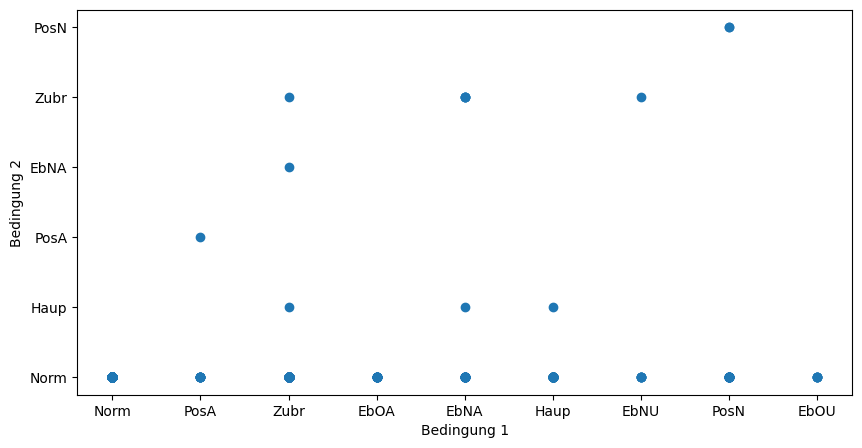

In [56]:
plot_scatter(df.Bedingung1, 
             df.Bedingung2, 
             figsize=(10,5),
             title='', xlabel='Bedingung 1', ylabel='Bedingung 2')


### Duplicates - NOT RELEVANT WITHOUT OTHERS DATA
- There are 34 suplicates, which is 0.017% -> delete  
- Hypothesis 1: These features, which are reprensented the most have approximately the same target

In [446]:
_ = df[df.drop(columns='Verkaufspreis').duplicated()].shape[0]
print(f'How many duplicates in dataset? {_} ({_ / df.shape[0]}%)')


How many duplicates in dataset? 34 (0.017%)


In [493]:
high_distribution_subset = ['Wohngebiet', 'Bedingung1', 'Bedingung2', 'Gebauedetyp', 
                         'Wohnungsstil', 'Gelaendekontur', 'Gelaendeneigung', 'Strassentyp', 'Verkaufspreis']

_ = df[df.duplicated(subset=high_distribution_subset)].shape[0]

high_distribution_subset = high_distribution_subset[:-1]

print(f'How many duplicates only with amoung choosen features with highly unequal distribution: {_}')


How many duplicates only with amoung choosen features with highly unequal distribution: 375


# ???

In [517]:
high_distribution_values=[df[feature].value_counts().index[0] for feature in high_distribution_subset]
for i in range(len(high_distribution_values)):
    print(f'(df[\'{high_distribution_subset[i]}\'] == \'{high_distribution_values[i]}\') & ' , end='')

(df['Wohngebiet'] == 'WN') & (df['Bedingung1'] == 'Norm') & (df['Bedingung2'] == 'Norm') & (df['Gebauedetyp'] == '1Fam') & (df['Wohnungsstil'] == '1Sto') & (df['Gelaendekontur'] == 'Ebn') & (df['Gelaendeneigung'] == 'San') & (df['Strassentyp'] == 'Pfla') & 

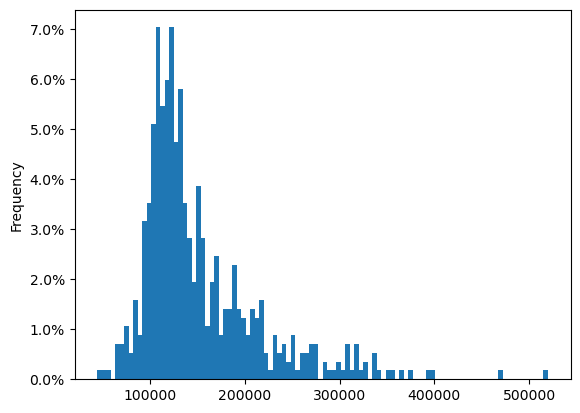

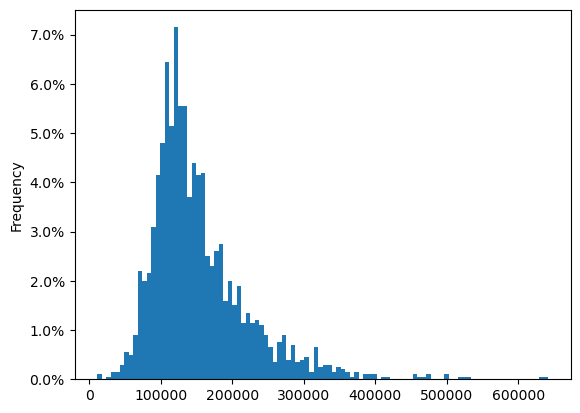

In [524]:
buf = df[(df['Wohngebiet'] == 'WN') & 
         (df['Bedingung1'] == 'Norm') & 
         (df['Bedingung2'] == 'Norm') & 
         (df['Gebauedetyp'] == '1Fam') & 
         (df['Wohnungsstil'] == '1Sto') & 
         (df['Gelaendekontur'] == 'Ebn') & 
         (df['Gelaendeneigung'] == 'San') & 
         (df['Strassentyp'] == 'Pfla')]
buf
plot_histogram(buf['Verkaufspreis'], 100, figsize=None, title='', xlabel='', ylabel='Frequency')
plot_histogram(df['Verkaufspreis'], 100, figsize=None, title='', xlabel='', ylabel='Frequency')

In [429]:
features_numeric

['Hausqualitaet', 'Hauszustand', 'Grundstuecksgroesse', 'Strassenlaenge']